In [3]:
# Libraries
# ==============================================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skforecast.ForecasterAutoregDirect import ForecasterAutoregDirect
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [2]:
!pip install skforecast

  Obtaining dependency information for skforecast from https://files.pythonhosted.org/packages/47/c8/78f5790b1b6b6900709fb204e28966e0b1c8d7659c780bd37ccc19d7fd2e/skforecast-0.11.0-py3-none-any.whl.metadata
  Obtaining dependency information for tqdm<4.67,>=4.57.0 from https://files.pythonhosted.org/packages/2a/14/e75e52d521442e2fcc9f1df3c5e456aead034203d4797867980de558ab34/tqdm-4.66.2-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ------- -------------------------------- 10.2/57.6 kB ? eta -:--:--
     --------------------------------- ---- 51.2/57.6 kB 650.2 kB/s eta 0:00:01
     -------------------------------------- 57.6/57.6 kB 607.0 kB/s eta 0:00:00
  Obtaining dependency information for optuna<3.5,>=2.10.0 from https://files.pythonhosted.org/packages/05/3c/e9715756751e56f7df4b64c999650f418f6b48f73a824bbfe8e3604385e2/optuna-3.4.0-py3-none-any.whl.metadata
  Obtaining dependency information for joblib<1.4,>=1.1.0 from https://

In [92]:
data = pd.read_csv('bk_frx.csv')
data['date'] = data['date'].str.replace('"', '').astype(float)
data['open'] = data['open'].str.replace('"', '').astype(float)
data['high'] = data['high'].str.replace('"', '').astype(float)
data['low'] = data['low'].str.replace('"', '').astype(float)
data['close'] = data['close'].str.replace('"', '').astype(float)
data.interpolate(method='linear', inplace=True) # IMPUTATION 
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)
data



Missing values:
 date     0
open     0
high     0
low      0
close    0
dtype: int64


,date,open,high,low,close
0,1.355371e+12,5158.812609,5158.812609,5158.812609,5158.812609
1,1.355375e+12,5162.015652,5171.325217,5139.502174,5160.725217
2,1.355378e+12,5160.425652,5179.206087,5159.204348,5178.722174
3,1.355382e+12,5170.703043,5182.823913,5169.689130,5181.095652
4,1.355386e+12,5180.980435,5190.912174,5175.749565,5181.256957
...,...,...,...,...,...
4881,1.417338e+12,20322.481304,20329.186957,20216.873043,20218.900870
4882,1.417342e+12,20215.052609,20294.506522,20193.599130,20197.700870
4883,1.417345e+12,20198.253913,20234.132609,20153.526522,20183.506087
4884,1.417349e+12,20182.814783,20219.177391,20093.913043,20130.506087


In [93]:
data = data.set_index('date')
data = data['open']

In [94]:
data

date
1.355371e+12     5158.812609
1.355375e+12     5162.015652
1.355378e+12     5160.425652
1.355382e+12     5170.703043
1.355386e+12     5180.980435
                    ...     
1.417338e+12    20322.481304
1.417342e+12    20215.052609
1.417345e+12    20198.253913
1.417349e+12    20182.814783
1.417352e+12    20129.123478
Name: open, Length: 4886, dtype: float64

In [95]:
steps = 200
data_train = data.iloc[:-steps]
data_test  = data.iloc[-steps:]

len(data_train)

4686

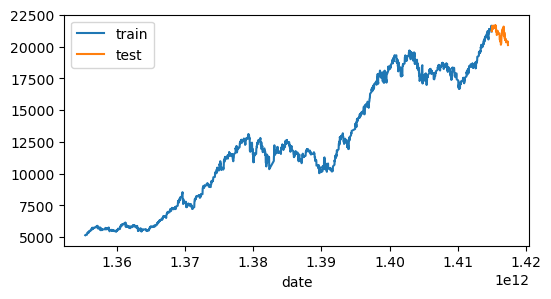

In [96]:
fig, ax = plt.subplots(figsize=(6, 3))
data_train.plot(ax=ax, label='train')
data_test.plot(ax=ax, label='test')
ax.legend();

In [97]:
forecaster = ForecasterAutoregDirect(
                 regressor     = Ridge(),
                 steps         = 200,
                 lags          = 1,
                 transformer_y = None,
                 n_jobs        = 'auto'
             )

forecaster.fit(y=data_train)
forecaster

C:\Users\OVAK\anaconda3\envs\tf_cpu\Lib\site-packages\skforecast\utils\utils.py:815: UserWarning: `y` has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.
  warnings.warn(
C:\Users\OVAK\anaconda3\envs\tf_cpu\Lib\site-packages\skforecast\utils\utils.py:815: UserWarning: `y` has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.
  warnings.warn(


ForecasterAutoregDirect 
Regressor: Ridge() 
Lags: [1] 
Transformer for y: None 
Transformer for exog: None 
Weight function included: False 
Window size: 1 
Maximum steps predicted: 200 
Exogenous included: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [0, 4685] 
Training index type: RangeIndex 
Training index frequency: 1 
Regressor parameters: {'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'positive': False, 'random_state': None, 'solver': 'auto', 'tol': 0.0001} 
fit_kwargs: {} 
Creation date: 2024-05-01 14:00:38 
Last fit date: 2024-05-01 14:00:39 
Skforecast version: 0.11.0 
Python version: 3.11.5 
Forecaster id: None 

In [98]:
predictions = forecaster.predict(steps=[1, 5])
display(predictions)

C:\Users\OVAK\anaconda3\envs\tf_cpu\Lib\site-packages\skforecast\utils\utils.py:877: UserWarning: `last_window` has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.
  warnings.warn(


1    21193.525692
5    21199.936255
Name: pred, dtype: float64

In [99]:
predictions = forecaster.predict()
display(predictions.head(3))

C:\Users\OVAK\anaconda3\envs\tf_cpu\Lib\site-packages\skforecast\utils\utils.py:877: UserWarning: `last_window` has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.
  warnings.warn(


1    21193.525692
2    21195.214925
3    21196.893541
Name: pred, dtype: float64

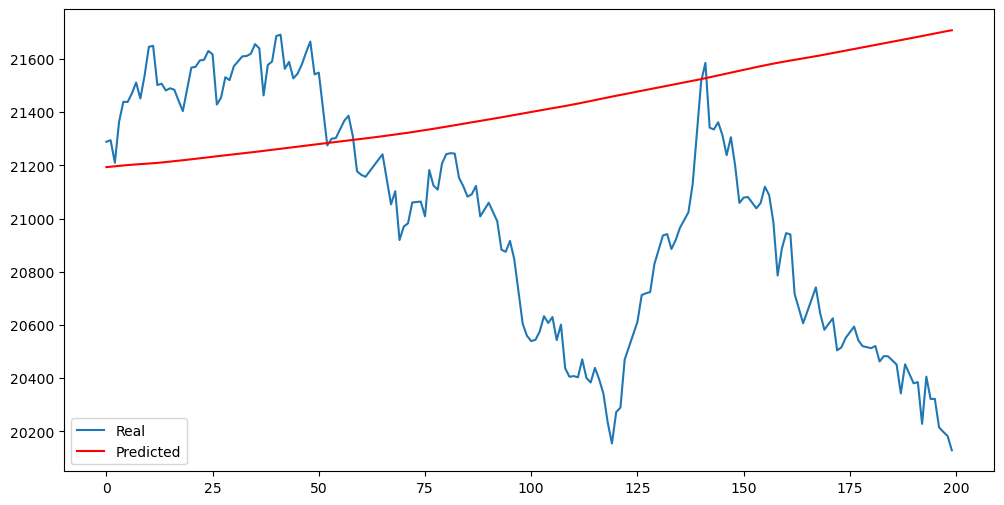

In [100]:
#fig, ax = plt.subplots(figsize=(6, 3))
#data_train.plot(ax=ax, label='train')
#data_test.values[:36].plot(ax=ax, label='test')
#predictions.plot(ax=ax, label='predictions')
#ax.legend();

plt.figure(figsize=(12, 6), dpi=100)
plt.plot( data_test.values[0:200], label='Real')
plt.plot( predictions.values, color='red', label='Predicted')

plt.legend()
plt.show()

ForecasterAutoregDirect 
Regressor: Ridge() 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15] 
Transformer for y: None 
Transformer for exog: None 
Weight function included: False 
Window size: 15 
Maximum steps predicted: 36 
Exogenous included: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [Timestamp('1991-07-01 00:00:00'), Timestamp('2005-06-01 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: MS 
Regressor parameters: {'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'positive': False, 'random_state': None, 'solver': 'auto', 'tol': 0.0001} 
fit_kwargs: {} 
Creation date: 2024-05-01 13:59:39 
Last fit date: 2024-05-01 13:59:40 
Skforecast version: 0.11.0 
Python version: 3.11.5 
Forecaster id: None 

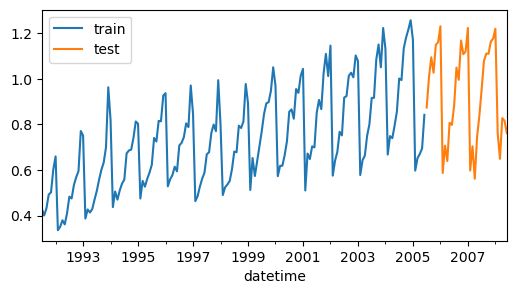

In [88]:
url = (
    'https://raw.githubusercontent.com/JoaquinAmatRodrigo/skforecast/master/'
    'data/h2o.csv'
)
data = pd.read_csv(url, sep=',', header=0, names=['y', 'datetime'])

# Data preprocessing
# ==============================================================================
data['datetime'] = pd.to_datetime(data['datetime'], format='%Y-%m-%d')
data = data.set_index('datetime')
data = data.asfreq('MS')
data = data['y']
data = data.sort_index()

# Split train-test
# ==============================================================================
steps = 36
data_train = data[:-steps]
data_test  = data[-steps:]

# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3))
data_train.plot(ax=ax, label='train')
data_test.plot(ax=ax, label='test')
ax.legend();
forecaster = ForecasterAutoregDirect(
                 regressor     = Ridge(),
                 steps         = 36,
                 lags          = 15,
                 transformer_y = None,
                 n_jobs        = 'auto'
             )

forecaster.fit(y=data_train)
forecaster

In [89]:
predictions = forecaster.predict(steps=[1, 5])
display(predictions)

2005-07-01    0.952051
2005-11-01    1.179922
Name: pred, dtype: float64

In [90]:
predictions = forecaster.predict()
display(predictions.head(3))

2005-07-01    0.952051
2005-08-01    1.004145
2005-09-01    1.114590
Name: pred, dtype: float64

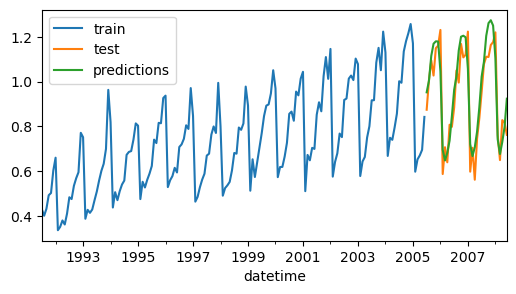

In [91]:
fig, ax = plt.subplots(figsize=(6, 3))
data_train.plot(ax=ax, label='train')
data_test.plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')
ax.legend();